# Chapter 4. Neural Network Learning

Learning means getting the optimized weight values from train data by minimizing the value of loss function.

## 4.1 learn from data

In the case of image classification,  
Machine learning such as SVM, KNN, etc: train the pattern of the features extracted from the images. However, the features are still selected by human.  
Neural Network (Deep Learning): Machine chooses and extracts the important features from the images for itself.

In order to evaluate universal ability, we normally deal with learning machine by dividing the data into train data and test data. (universal ability stands for the ability that can solve the problmes machine never met before.)

## 4.2. loss function

Nerual network find the optimized weight and bias values by minimizing loss function. i.e. Mean squared error(MSE) and cross entropy error(CEE) are usually used as the loss function.  
The reason why we can get the optimized values based on accuracy is accuracy has many points where the differentiated value is 0.

- Mean squared error(MSE) for one data
  
    $ E =  \frac{1}{2} \Sigma_k (y_k - t_k)^2$

In [1]:
import numpy as np
def mean_squared_error(y, t):
    return 0.5*np.sum((y-t)**2)

# Example
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
t = [0,0,1,0,0,0,0,0,0,0] #one hot encoing

mean_squared_error(np.array(y), np.array(t))

0.5975

- Cross entropy error(CEE) for one data
  
    $ E = - \Sigma_k t_k log y_k$ ($log$ is natural logarithm: $log_e$)

In [2]:
def cross_entropy_error(y,t):
    delta = 1e-7 #very tiny value
    return -np.sum(y*np.log(y + delta)) #To prevent the denominator from being 0 and the result from being -inf

# Example
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
t = [0,0,1,0,0,0,0,0,0,0] #one hot encoing

cross_entropy_error(np.array(y),np.array(t))

1.2968435295135659

 Above formulas are only for one data. The below is loss function for the whole data.

- Cross entropy error(CEE) for whole data  
    $E = -\frac{1}{N}\Sigma_n\Sigma_kt_{nk}logy_{nk}$  
    ($log$ is natural logarithm($log_e$) and  $t_nk$ is $k^{th}$value of $n^{th}$data)

- Mini-batch
    train some of the datas in neural network learning

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
import numpy as np

X = mnist['data']
T = mnist['target']

x_train = X[:60000]
t_train = T[:60000]
x_test = X[60000:]
t_test = T[60000:]

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000,)


In [4]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

- Cross entropy error(CEE) for mini-batch

In [5]:
def cross_entropy_error_minibatch(y,t): #one hot encoding
    if y.ndim == 1: #make the array to 2-d
        y = y.reshape(1,y.size)
        t = t.reshape(1,t.size)
    
    delta = 1e-7
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+delta))/batch_size

In [6]:
def cross_entrpy_error_minibatch_1(y,t): #when the answer array consists of number label(not one hot enocoding)
    if y.ndim == 1: #make the array to 2-d
        y = y.reshape(1,y.size)
        t = t.reshape(1,t.size)
    
    delta = 1e-7
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+delta))/batch_size

Accuracy is not changed by a tiny correction. Though accuracy respond to the small correction, the value of accuracy is changed discontinuously. Thus, we can not use accuracy as an indicator. It is similar to the reason why we don't use step function as an activation function. On the other hand, slope of Sigmoid function is changed continuously.

## 

## 4.3 Numerical Differentiation

- differentiation
$$ \frac{df(x)} {dx} = lim_{h->0} \frac{f(x+h)-f(x)}{h} $$

In [7]:
def numerical_diff(f,x):
    h = 1e-4 #0.0001
    return (f(x+h) - f(x-h))/(2*h) #central difference

- partial derivative  
we use it when there are more than or equal to 2 variables.  
e.g. $ \frac {\delta f}{\delta x_0} $  
we set a target variable among several variables and differentiate the formula considering other variables except for the target variable as constants.

## 4.4 Gradient

Gradient is a vector representation of the partial derivatives of all variables. e.g. $(\frac {\delta f}{\delta x_0},\frac {\delta f}{\delta x_1})$

In [8]:
import numpy as np
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    print('x size', x.size)
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2)/(2*h)
        x[idx] = tmp_val
    
    return grad

- gradient method(gradient descent)  
    Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent. Conversely, stepping in the direction of the gradient will lead to a local maximum of that function; the procedure is then known as gradient ascent.  [reference: https://en.wikipedia.org/wiki/Gradient_descent ]

$$ x_0 = x_0 - \eta \frac{\delta f}{\delta x_0} $$  
$$ x_1 = x_1 - \eta \frac{\delta f}{\delta x_1} $$
$\eta$ is the learning rate that stands for the amount that the parameters are updated.

In [9]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr*grad
    return x

e.g. $f(x_0, x_1) = x_0^2+x_1^2$

In [10]:
def function(x): 
    return x[0]**2 + x[1]**2

In [11]:
import numpy as np
init_x = np.array([-3.0, 4.0])
gradient_descent(function, init_x, lr=0.1, step_num=100)

x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2
x size 2


array([-6.11110793e-10,  8.14814391e-10])

We call parameter such as learning rate hyper parameter. While weight parameter of neural network is the automatically calculated parameter, hyper parameters like learning rate should be set by a human. Thus, we have to find the optimized learning rate by testing various values.

$ W = \left[\begin{array}{rrr} 
w_{11}&w_{12}&w_{13}\\
w_{21}&w_{22}&w_{23}\\
\end{array}\right]$ #weights

$ \frac{\delta L}{\delta W} = \left[\begin{array}{rrr} 
\frac {\delta L}{\delta w_{11}} & \frac {\delta L}{\delta w_{12}} & \frac {\delta L}{\delta w_{13}}\\
\frac {\delta L}{\delta w_{21}} & \frac {\delta L}{\delta w_{22}} & \frac {\delta L}{\delta w_{23}}\\
\end{array}\right]$ 

i.e. get numerical gradient of weights

In [12]:
import numpy as np
from functions import softmax, cross_entropy_error
from gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        return loss

In [13]:
net = simpleNet()
print(net.W)
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print('max index:', np.argmax(p))
t = np.array([0, 0, 1])
net.loss(x,t)

[[ 0.25071009 -0.27777949 -0.08377893]
 [ 0.02727741 -0.97571362 -0.74860081]]
[ 0.17497573 -1.04480995 -0.72400809]
max index: 0


1.430949848036708

In [14]:
def f(w): # f = lambda w: net.loss(x,t)
    return net.loss(x,t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.35246904  0.1040818  -0.45655084]
 [ 0.52870356  0.1561227  -0.68482625]]


## 4.5 Learning Algorithm implementation

Neural network have adaptible weights and bias. Learning is modulating them according to the train data.  
- $1^{st}$stage - minibatch  
- $2^{nd}$stage - gradient calculation  
- $3^{rd}$stage - parameter updates  
- $4^{th}$stage - repetition  

We call this process stochastic gradient descent(SGD) because we extract data randomly using minibatch

In [34]:
from functions import *
from gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        #initiate weights
        self.params ={}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1)+b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2)+b2
        y = softmax(a2)
        return y
    
    def loss(self, x, t): #x: input data, t:answer data
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        #t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t)/float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x,t) #p138 ?
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads

In [16]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

X = mnist['data']
T = mnist['target']

x_train = X[:60000]
t_train = T[:60000]
x_test = X[60000:]
t_test = T[60000:]

train_loss_list = []

#hyper parameter
iters_num = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    print(i)
    #mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    t_batch = np.array(list(map(int, t_batch))) #change the type of data in target batch from str to int
    
    #gradient
    grad = network.numerical_gradient(x_batch, t_batch)
    #grad = network.gradient(x_batch, t_batch) #upgrade version
    
    #update parameters
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    #train-loss
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

0
1
2
3
4
5
6
7
8
9


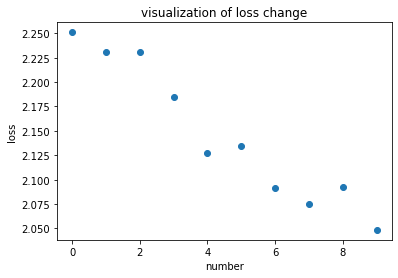

In [17]:
import matplotlib.pyplot as plt

x1 = np.arange(0,10,1)
y1 = train_loss_list
plt.scatter(x1,y1)
plt.xlabel('number')
plt.ylabel('loss')
plt.title('visualization of loss change')
plt.show()

It shows the value of loss function decreases as the number of learning increase. It means weight parameter of neural network is changed adjusting to data more and more. When we make computer train data, we should make sure that the training makes overfitting.

In [35]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

X = mnist['data']
T = mnist['target']

x_train = X[:60000]
t_train = T[:60000]
x_test = X[60000:]
t_test = T[60000:]

#change the type of target data from str to int
t_train = np.array(list(map(int, t_train))) 
t_test = np.array(list(map(int, t_test))) 

train_loss_list = []
train_acc_list = []
test_acc_list = []

#hyper parameter
iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1


iter_per_epoch = max(train_size/batch_size, 1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    print(i)
    #mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    #t_batch = np.array(list(map(int, t_batch))) #change the type of data in target batch from str to int
    
    #gradient
    grad = network.numerical_gradient(x_batch, t_batch)
    #grad = network.gradient(x_batch, t_batch) #upgrade version
    
    #update parameters
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    #train-loss
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    #accuracy per epoch
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc:', str(train_acc), '/ test acc:', str(test_acc))

0
train acc: 0.14123333333333332 / test acc: 0.1403
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90


/Users/seokhyeonlee/Desktop/Source/Deep Learning from scratch 1/functions.py:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
3

1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999


In [36]:
#2000-iter accuracy
train_acc = network.accuracy(x_train, t_train)
test_acc = network.accuracy(x_test, t_test)
train_acc_list.append(train_acc)
test_acc_list.append(test_acc)
print('train acc:', str(train_acc), '/ test acc:', str(test_acc))

train acc: 0.8594833333333334 / test acc: 0.8664


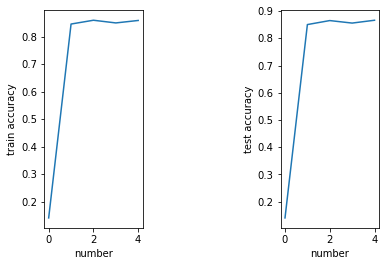

In [43]:
import matplotlib.pyplot as plt

x1 = np.arange(0,5,1)
x2 = np.arange(0,5,1)
y1 = train_acc_list
y2 = test_acc_list

plt.subplot(1,3,1)
plt.plot(x1,y1)
plt.xlabel('number')
plt.ylabel('train accuracy')

plt.subplot(1,3,3)
plt.plot(x2,y2)
plt.xlabel('number')
plt.ylabel('test accuracy')
plt.show()